In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D



In [3]:
data = pd.read_excel("train.xlsx")

In [4]:
data.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


In [5]:
# removing the target variable to perform clusterring
data  = data.drop('target',axis=1)

In [6]:
data.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80


In [7]:
scaller = StandardScaler()

In [8]:
scaled_data = scaller.fit_transform(data)

In [12]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)

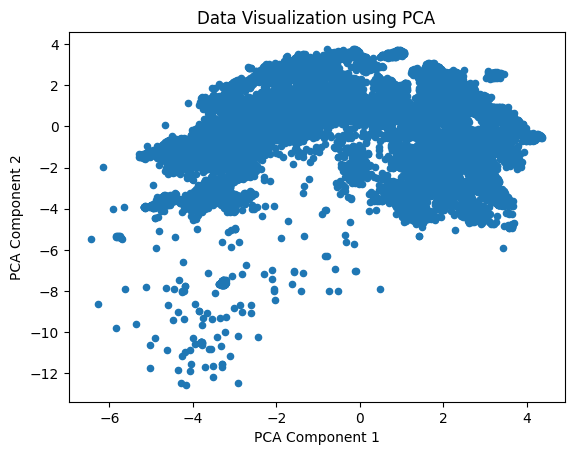

In [15]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], s=20)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data Visualization using PCA')
plt.show()

In [21]:
# let us estimate that the no of clusters we have are 3
kmeans = KMeans (n_clusters=3)
kmeans.fit(scaled_data)


KMeans(n_clusters=3)

In [22]:
data['clusters'] = kmeans.labels_

In [23]:
data.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,clusters
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,2
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,0
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,1
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,0


In [35]:
def predict_cluster(new_data_point):
    # Scale the new data point
    new_data_point_scaled = scaller.transform([new_data_point])
    
    # Predict the cluster
    cluster = kmeans.predict(new_data_point_scaled)[0]
    
    # Find the closest cluster center
    closest_center = kmeans.cluster_centers_[cluster]
    
    # Calculate the distance to the closest center
    distance = np.linalg.norm(new_data_point_scaled - closest_center)
    
    explanation = f"The data point belongs to cluster {cluster} because it is closest to the cluster center {closest_center}, with a distance of {distance:.4f}."
    
    return cluster, explanation

In [40]:
new_data_point = [-70, -61, -66, -53, -51, -63, -82, -57, -76, -78, -66, -66, -61, -59, -73, -75, -63, -77]
cluster, explanation = predict_cluster(new_data_point)

print(f"Cluster: {cluster}")
print(f"Explanation: {explanation}")

Cluster: 0
Explanation: The data point belongs to cluster 0 because it is closest to the cluster center [ 0.2162088   0.31092019  0.52994195  0.72557505  0.69684488  0.64982336
  0.26408785  0.0715972  -0.0326713   0.27478223  0.36086937  0.53423289
  0.72287054  0.50094368  0.49006683  0.237684    0.0621212  -0.01547723], with a distance of 3.9224.


c:\Users\ps180\Downloads\ML\resolute task\task\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
